In [ ]:
#np.exp(pipe.predict(np.array(["Apple","Ultrabook",8,1.37,0,1,226.983005,"Intel Core i5",0,128,"Intel","Mac"]).reshape(1,-1)))
# np.exp(pipe.predict(np.array(["MSI","Gaming",16,1.86,0,1,117.68,"Intel Core i7",0,512,"Nvidia","Windows"]).reshape(1,-1)))
# np.exp(pipe.predict(np.array(["Apple","Ultrabook",8,1.37,0,1,226.983005,"Intel Core i5",0,128,"Intel","Mac"]).reshape(1,-1)))

In [48]:

'''
1 Data cleaning
2 EDA:exploratory data analysis
3 Feature Engineering
4 Modelling:for evaluation

'''

'''
task:
creating a website based on a machine learning model
if the user provide desired configuration of their laptop
then this model will predict  price point based on the configuration

soln:in todays date if a person wants to buy a laptop +
he knows the features and all
then our webasite can help him to predict the market price of laptop
based on desired configurantion at this point of time

challenge:
its' a bit challenging to create a website based on the given dataset
'''



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import hvplot
# import hvplot.backend_transforms
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [49]:
data = pd.read_csv('laptop_data.csv')
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [50]:
data.shape

(1303, 12)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [52]:
print(data.isnull().sum())

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [53]:
data.drop(columns=['Unnamed: 0'],inplace=True) #removing unnamed col as it is of no use

In [54]:
data['Ram'] =data['Ram'].str.replace('GB','')#replacing GB from Ram col with ""
data['Weight'] = data['Weight'].str.replace('kg','')#replacing Kg from weight col with ""


In [55]:

data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [56]:

data['Ram'] = data['Ram'].astype('int32')#changing the value 'object' into 'int'
data['Weight'] = data['Weight'].astype('float32')#changing the value 'object' into 'float'

In [57]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


###Price column Analysis###

In [58]:
import seaborn as sns

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.]),
 [Text(-100000.0, 0, '−100000'),
  Text(0.0, 0, '0'),
  Text(100000.0, 0, '100000'),
  Text(200000.0, 0, '200000'),
  Text(300000.0, 0, '300000'),
  Text(400000.0, 0, '400000')])

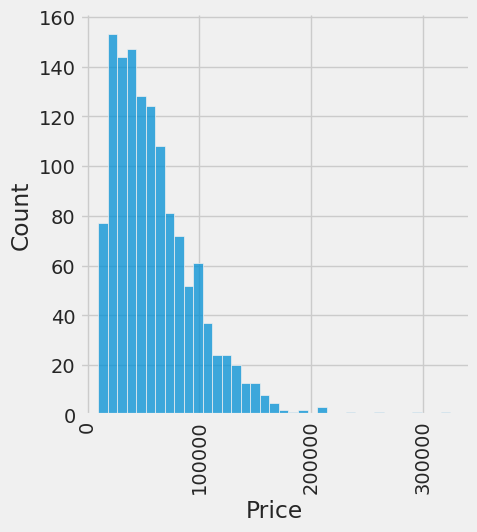

In [59]:
sns.displot(data['Price'])
plt.xticks(rotation='vertical')

<Axes: xlabel='Company'>

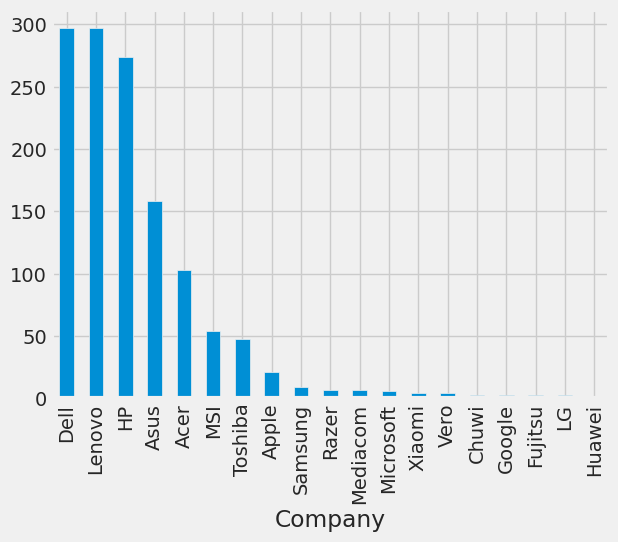

In [60]:
data['Company'].value_counts().plot(kind='bar')#laptop density based on company

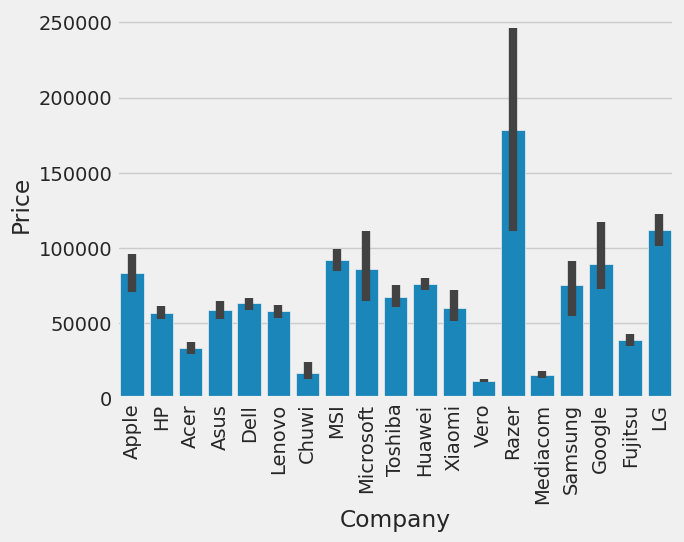

In [61]:
#checking each brand's laptop price as we will come to know that company col affect price or not
#does comapny affect price?
sns.barplot(x=data['Company'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

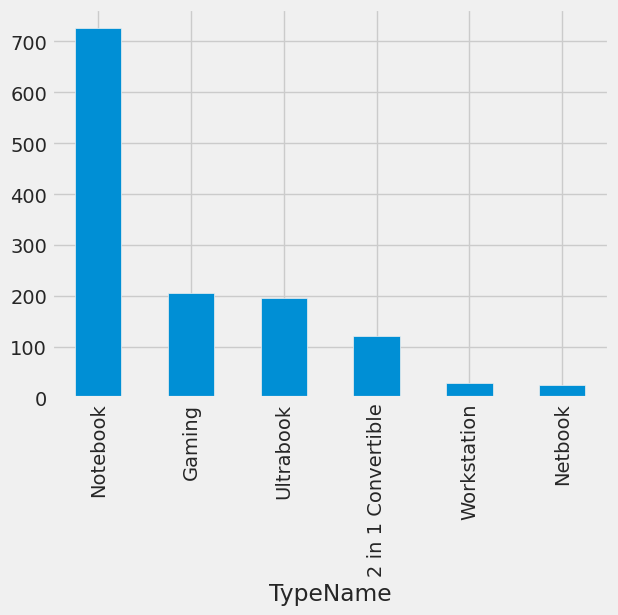

In [62]:
data['TypeName'].value_counts().plot(kind='bar')#types of laptop

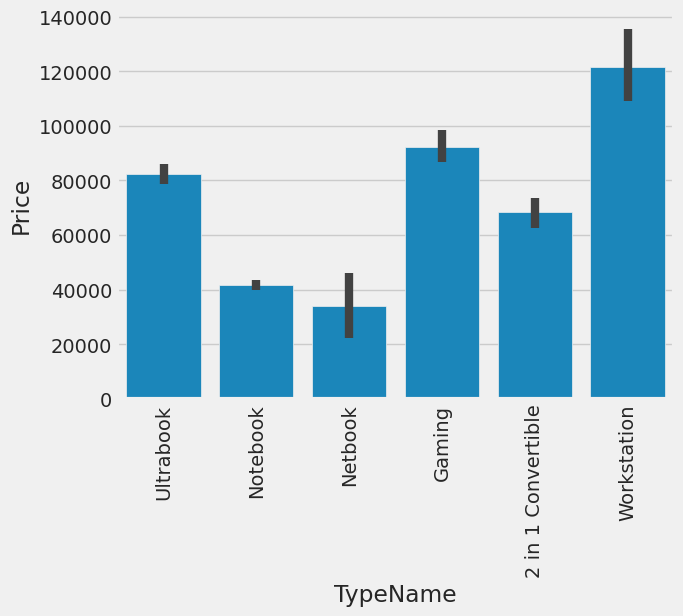

In [63]:
sns.barplot(x=data['TypeName'],y=data['Price'])#does type affect price?
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-64-ebcb28c56945>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Inches'])#does size affect price?


<Axes: xlabel='Inches', ylabel='Density'>

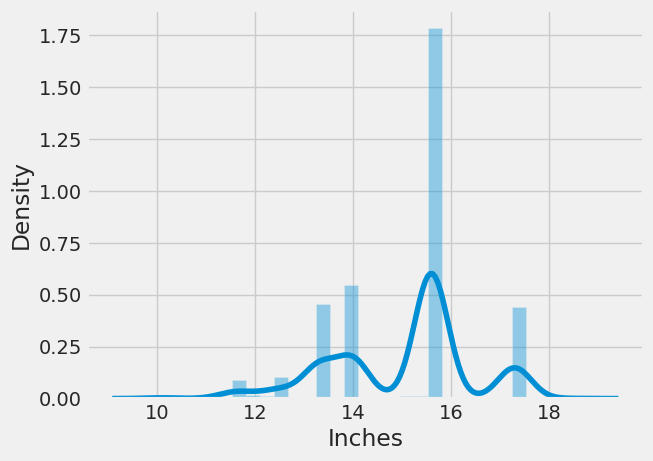

In [64]:
sns.distplot(data['Inches'])#does size affect price?

<Axes: xlabel='Inches', ylabel='Price'>

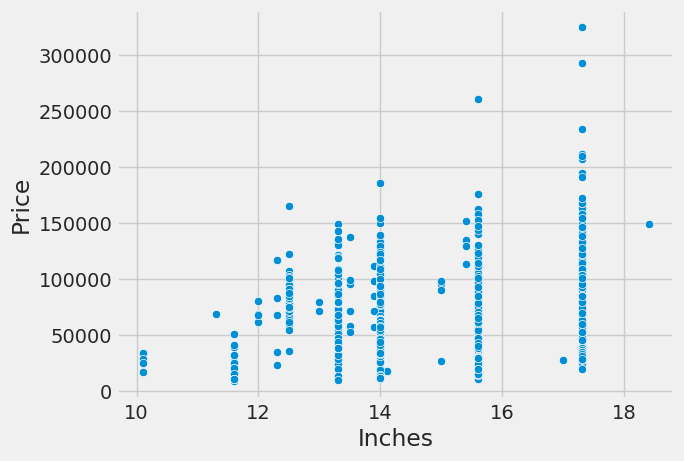

In [65]:
sns.scatterplot(x=data['Inches'],y=data['Price']) #does size affect price?based on descrete value
#somewhere prices varies on size of the laptop,there is wea\k relationship

**ScreenResolution**

In [66]:
data['ScreenResolution'].value_counts()#this col consist of lots of values and data

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [67]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
#ts=1
#non ts=0

In [68]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [69]:
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
496,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.17,47893.3920,0
252,Asus,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,1TB HDD,AMD Radeon R5 M420,Windows 10,1.68,24988.3200,0
1091,HP,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,No OS,1.86,18434.3472,0
476,Dell,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78,128298.2400,0
906,HP,Netbook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.26,79014.2400,0


<Axes: xlabel='Touchscreen'>

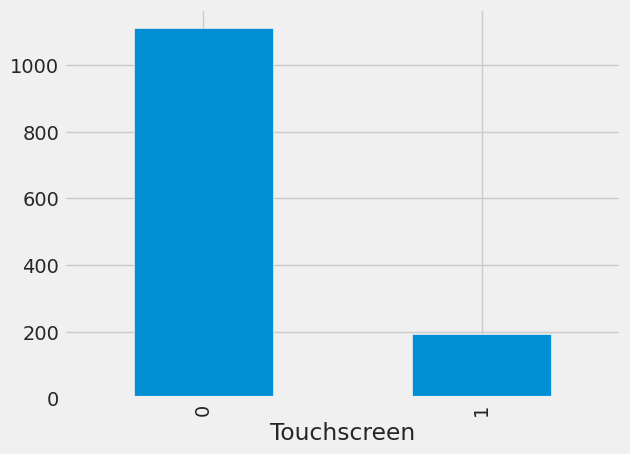

In [70]:

data['Touchscreen'].value_counts().plot(kind='bar')#touchscreen and non touchscreen
#ts counts is low

<Axes: xlabel='Touchscreen', ylabel='Price'>

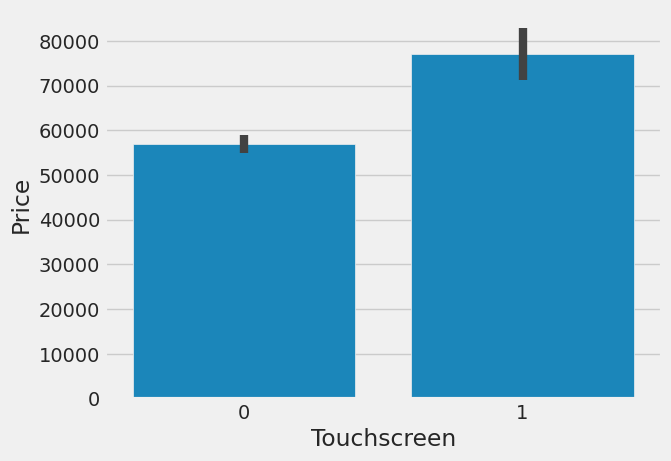

In [71]:

sns.barplot(x=data['Touchscreen'], y=data['Price'])#ts have higher  price than the non ts

In [72]:

data['Ips'] = data['ScreenResolution'].apply(lambda x:1 if  'IPS' in x else 0)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='Ips'>

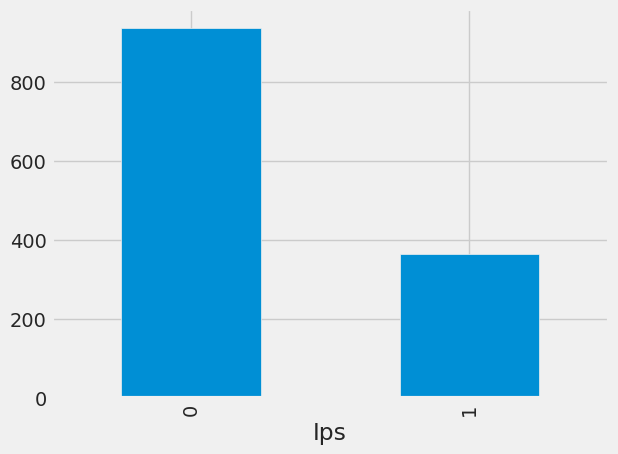

In [73]:
data['Ips'].value_counts().plot(kind='bar')#all laptop are ips

<Axes: xlabel='Ips', ylabel='Price'>

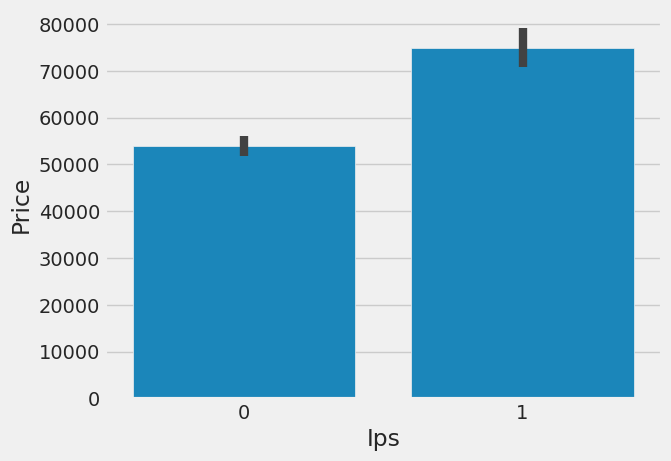

In [74]:
sns.barplot(x=data['Ips'],y=data['Price'])#price  varries with ips display

**X_res** **&** **Y_res**

In [75]:
new = data['ScreenResolution'].str.split('x',n=1,expand=True)

In [76]:
data['X_res']=new[0]#splitting new col into X_res and Y_res col
data['Y_res']=new[1]#splitting new col into X_res and Y_res col

In [77]:

data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [78]:

data['X_res'] = data['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])#to know the pattern

In [79]:

data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [81]:
data = data[~data['X_res'].str.contains('[^0-9]+')]#converting the object type to integer
data['X_res'] = data['X_res'].astype('int32')
data['Y_res'] = data['Y_res'].astype('int32')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [82]:
data['X_res'] = data['X_res'].astype(str)  # Convert 'X_res' to string type
data['Y_res'] = data['Y_res'].astype(str)  # Convert 'Y_res' to string type

data = data[~data['X_res'].str.contains('[^0-9]+')]  # Remove non-numeric values from 'X_res'
data['X_res'] = data['X_res'].astype('int32')  # Convert 'X_res' to integer
data['Y_res'] = data['Y_res'].astype('int32')  # Convert 'Y_res' to integer


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [84]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


data_numeric = data.copy()  # Make a copy of the original DataFrame
label_encoder = LabelEncoder()

# Iterate through each column
for column in data_numeric.columns:
    # Check if the column contains non-numeric data
    if data_numeric[column].dtype == 'object':
        # Use label encoding to convert non-numeric data to numerical
        data_numeric[column] = label_encoder.fit_transform(data_numeric[column])

# Compute correlation with 'Price_euros'
correlation_with_price = data_numeric.corr()['Price']
print(correlation_with_price)


Company             0.140371
TypeName           -0.127313
Inches              0.068197
ScreenResolution    0.331327
Cpu                 0.529334
Ram                 0.743007
Memory              0.185680
Gpu                 0.443299
OpSys               0.288911
Weight              0.210370
Price               1.000000
Touchscreen         0.191226
Ips                 0.252208
X_res               0.556529
Y_res               0.552809
Name: Price, dtype: float64


PPI column

In [85]:
# length(X_res) x breadth(Y_res)
data['ppi'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype('float')#to calculate ppi

In [86]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame
data_numeric = data.copy()  # Make a copy of the original DataFrame
label_encoder = LabelEncoder()

# Iterate through each column
for column in data_numeric.columns:
    # Check if the column contains non-numeric data
    if data_numeric[column].dtype == 'object':
        # Use label encoding to convert non-numeric data to numerical
        data_numeric[column] = label_encoder.fit_transform(data_numeric[column])

# Compute correlation with 'Price_euros'
correlation_with_price = data_numeric.corr()['Price']
print(correlation_with_price)


Company             0.140371
TypeName           -0.127313
Inches              0.068197
ScreenResolution    0.331327
Cpu                 0.529334
Ram                 0.743007
Memory              0.185680
Gpu                 0.443299
OpSys               0.288911
Weight              0.210370
Price               1.000000
Touchscreen         0.191226
Ips                 0.252208
X_res               0.556529
Y_res               0.552809
ppi                 0.473487
Name: Price, dtype: float64


In [87]:
data.drop(columns=['ScreenResolution'],inplace=True)#now we no longer require screenresolution column

In [88]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [89]:
data.drop(columns=['Inches','X_res','Y_res'],inplace=True)
#now we no longer require Inches X_res and Y_res column

In [90]:

data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


CPU

In [91]:
data['Cpu'].value_counts()
#aim to create 5 categories,namely:i3 i5 i7  other intel (Celeron,Pentium,etc.) & AMD

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [92]:
data['Cpu Name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))#we need 1st three word to spit

In [93]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [94]:
#a  function to split amd processor and intel processor
def fetch_processor(text):
  if text =='Intel Core i7' or text == 'Intel Core i5' or text =='Intel Core i3':
    return text
  else:
    if text.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

In [95]:

data['Cpu brand'] = data['Cpu Name'].apply(fetch_processor)
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

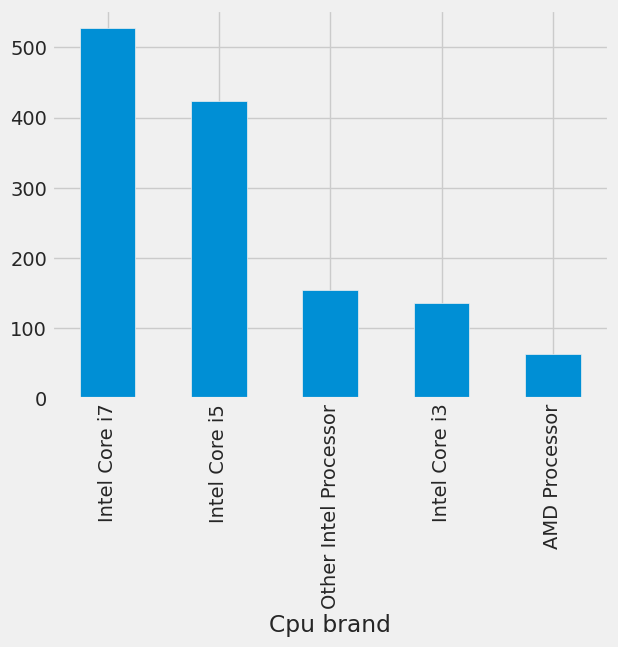

In [96]:
data['Cpu brand'].value_counts().plot(kind='bar')#counts of processor

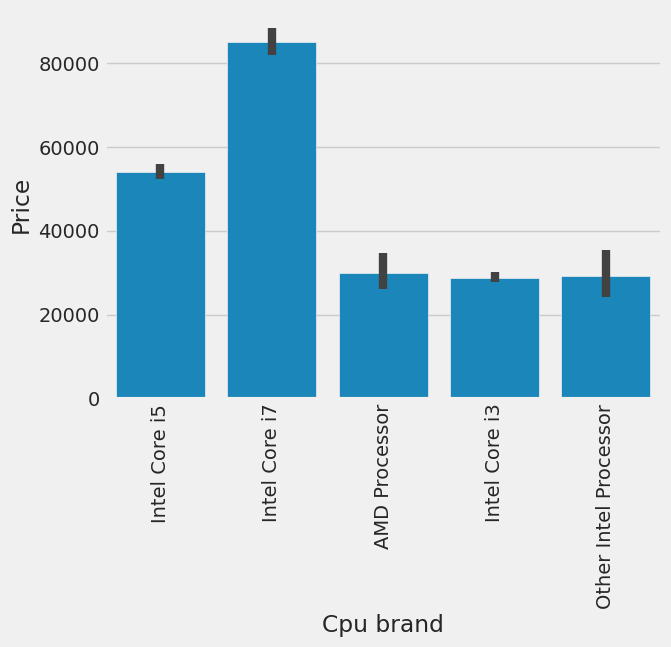

In [97]:
sns.barplot(x=data['Cpu brand'],y=data['Price'])#price analysis with cpu processor
plt.xticks(rotation='vertical')
plt.show()

In [98]:

data.drop(columns=['Cpu','Cpu Name'],inplace=True)#drop cpu and cpu name

In [99]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


RAM

<Axes: xlabel='Ram'>

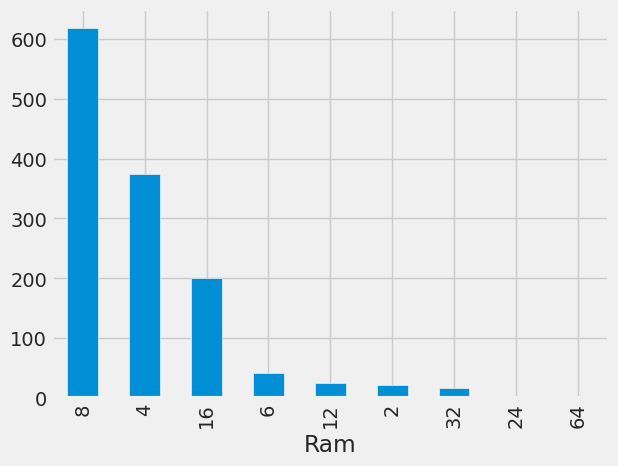

In [100]:
data['Ram'].value_counts().plot(kind='bar')#counts for ram

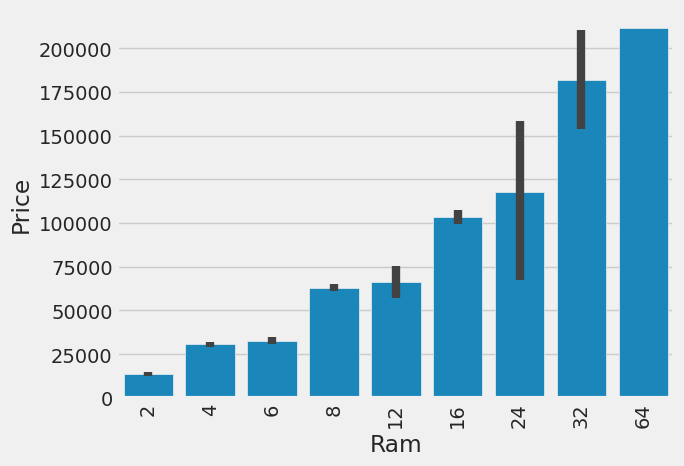

In [101]:
sns.barplot(x=data['Ram'],y=data['Price'])#ram col has verry strong corelation with price
plt.xticks(rotation='vertical')
plt.show()


MEMORY

In [103]:
#now we will focus on memory col
data['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

<Axes: xlabel='Memory'>

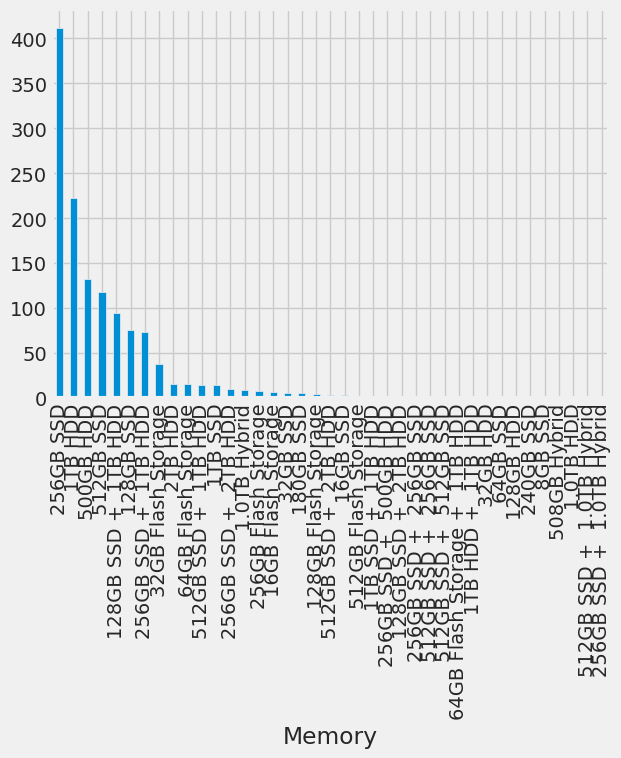

In [104]:
data['Memory'].value_counts().plot(kind='bar')#types of laptop

In [105]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [109]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '000')
new = data["Memory"].str.split("+", n = 1, expand = True)

In [110]:
data["first"]= new[0]
data["first"]=data["first"].str.strip()

data["second"]= new[1]

In [111]:
data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)


In [113]:
data['first'] = data['first'].str.replace(r'\D', '')

data["second"].fillna("0", inplace = True)

In [114]:
data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)


In [115]:
data['second'] = data['second'].str.replace(r'\D', '')

#data["first"] = data["first"].astype(int)
#data["second"] = data["second"].astype(int)


# Extract numeric values from "first" and "second" (consider errors)
data["first"] = pd.to_numeric(data["first"].str.replace(r'\D', '', regex=True), errors='coerce')
data["second"] = pd.to_numeric(data["second"].str.replace(r'\D', '', regex=True), errors='coerce')


In [116]:
data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])

In [117]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,0,1,0,0,0,0,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,0,0,0,0,0,0,0,256,0,0


In [118]:

data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [119]:

data.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
24,HP,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.91,35111.5200,0,0,141.211998,Intel Core i7,0,256,0,0
374,Dell,2 in 1 Convertible,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.62,46300.8528,1,0,165.632118,Intel Core i7,0,256,0,0
565,Dell,Ultrabook,8,128 SSD,Intel UHD Graphics 620,Windows 10,1.21,85194.7200,1,1,331.264236,Intel Core i5,0,128,0,0
158,Dell,2 in 1 Convertible,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.56,55890.7200,1,0,141.211998,Intel Core i7,0,256,0,0
226,Dell,Notebook,16,1000 HDD,AMD Radeon R7 M445,Windows 10,2.30,45768.0528,1,0,141.211998,Intel Core i7,1000,0,0,0


In [120]:
data.drop(columns=['Memory'],inplace=True)

In [121]:
correlation_with_price = data_numeric.corr()['Price']
print(correlation_with_price)

Company             0.140371
TypeName           -0.127313
Inches              0.068197
ScreenResolution    0.331327
Cpu                 0.529334
Ram                 0.743007
Memory              0.185680
Gpu                 0.443299
OpSys               0.288911
Weight              0.210370
Price               1.000000
Touchscreen         0.191226
Ips                 0.252208
X_res               0.556529
Y_res               0.552809
ppi                 0.473487
Name: Price, dtype: float64


In [122]:
data.drop(columns=['Hybrid','Flash_Storage'],axis = 1,inplace=True)

In [123]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


GPU

In [124]:



#Gpu col.: graphical processing unit
#there are 110 categories(too many),from which some cat.  does not repeat(i.e appears only  1 time)
#this type of col. should be tackled
data['Gpu'].value_counts()


Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [125]:
#creating a Gpu brand col. in which we ll add the splitted val of gpu col(gpu brand)
data['Gpu brand'] =  data['Gpu'].apply(lambda x:x.split()[0])
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [126]:


data['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [127]:
data = data[data['Gpu brand'] !='ARM']
#df['Gpu brand'].value_counts()

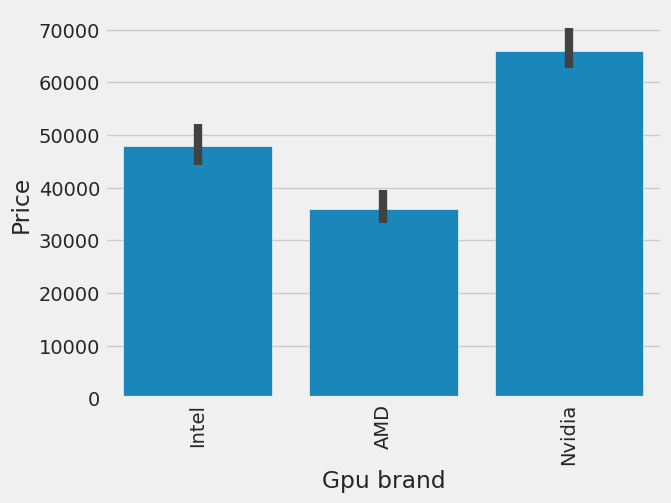

In [128]:
sns.barplot(x=data['Gpu brand'],y=data['Price'],estimator= np.median)
plt.xticks(rotation='vertical')
plt.show()
#gpu brand is essential as it directly impacts on price

In [129]:
# as we no longer require gpu col. drop it
data.drop(columns=['Gpu'], inplace=True)
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


OPSYS

In [130]:

#Opsys
data['OpSys'].value_counts()
#here all windows, macOs,& linux os's categories can be club rspt.

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

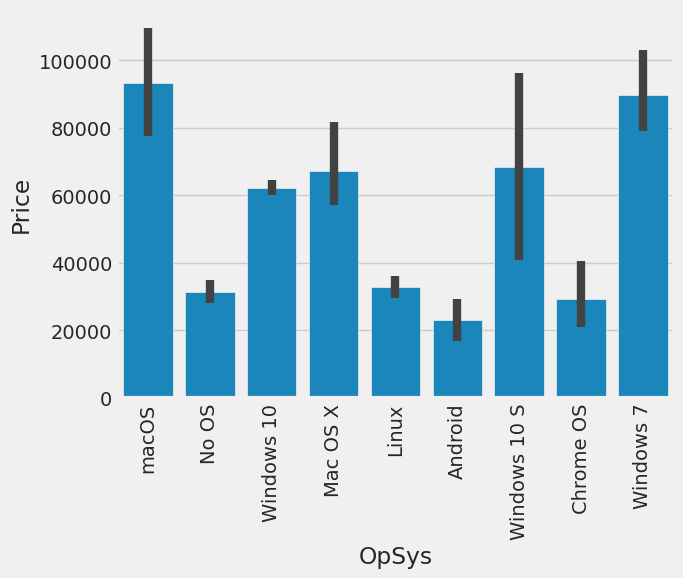

In [131]:
sns.barplot(x=data['OpSys'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [132]:
#combining all windows categories as 'windows' and mac os  as 'mac os'
def cat_os(inp):
  if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
    return 'Windows'
  elif inp == 'macOS' or inp == 'Mac OS X':
    return 'Mac'
  else:
    return 'Others/No OS/Linux'


In [133]:
data['os'] = data['OpSys'].apply(cat_os)


In [134]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [135]:
data.drop(columns=['OpSys'], inplace=True)

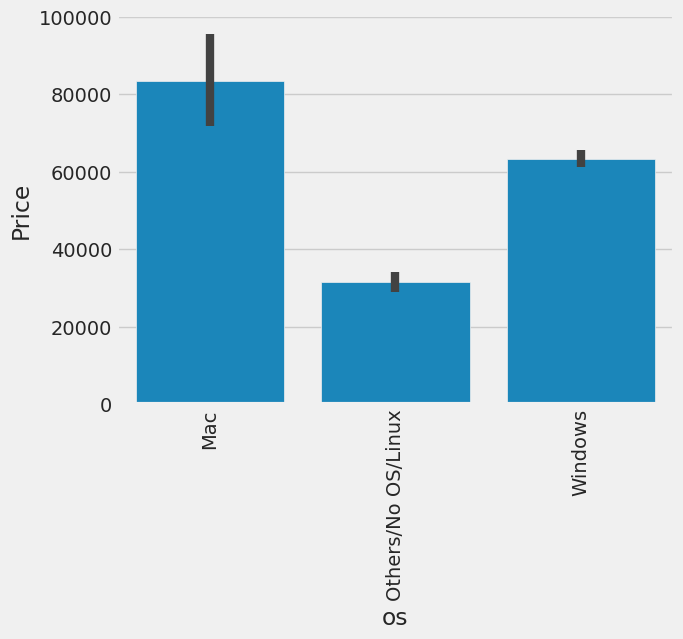

In [136]:
sns.barplot(x=data['os'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

WEIGHT

<ipython-input-137-8d3698e8106b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

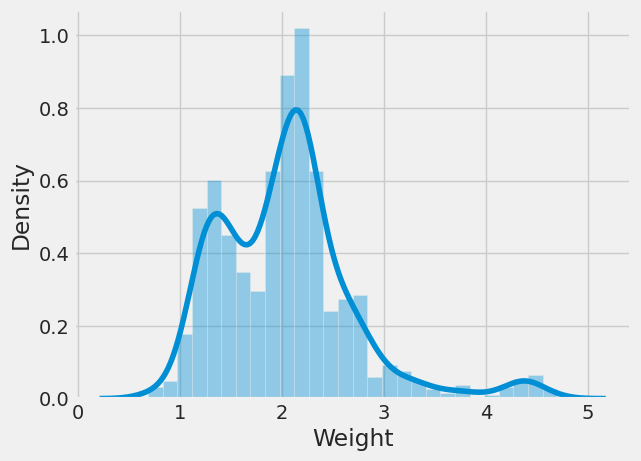

In [137]:
#weight col
sns.distplot(data['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

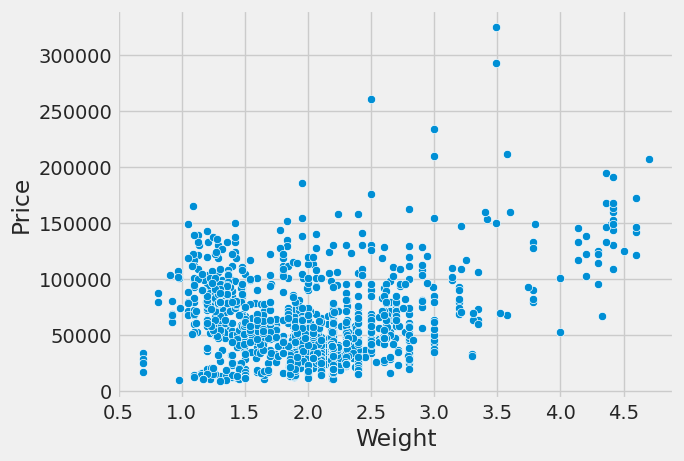

In [138]:
#a weak linear relationship bet price and weight
sns.scatterplot(x=data['Weight'],y=data['Price'])

In [139]:
correlation_with_price = data_numeric.corr()['Price']
print(correlation_with_price)

Company             0.140371
TypeName           -0.127313
Inches              0.068197
ScreenResolution    0.331327
Cpu                 0.529334
Ram                 0.743007
Memory              0.185680
Gpu                 0.443299
OpSys               0.288911
Weight              0.210370
Price               1.000000
Touchscreen         0.191226
Ips                 0.252208
X_res               0.556529
Y_res               0.552809
ppi                 0.473487
Name: Price, dtype: float64


                   Company  TypeName    Inches  ScreenResolution       Cpu  \
Company           1.000000 -0.007718 -0.085784          0.094772  0.044593   
TypeName         -0.007718  1.000000 -0.077428         -0.175618 -0.128174   
Inches           -0.085784 -0.077428  1.000000         -0.247841  0.153041   
ScreenResolution  0.094772 -0.175618 -0.247841          1.000000  0.232751   
Cpu               0.044593 -0.128174  0.153041          0.232751  1.000000   
Ram               0.046508 -0.242862  0.237993          0.238280  0.468942   
Memory            0.048086  0.019091 -0.193382          0.059042 -0.013264   
Gpu               0.026537 -0.204774  0.215710          0.160816  0.490761   
OpSys             0.134290  0.085223  0.034528          0.070360  0.125374   
Weight           -0.129610 -0.267002  0.827631         -0.135653  0.189229   
Price             0.140371 -0.127313  0.068197          0.331327  0.529334   
Touchscreen       0.038703 -0.417188 -0.361735          0.469176

<Axes: >

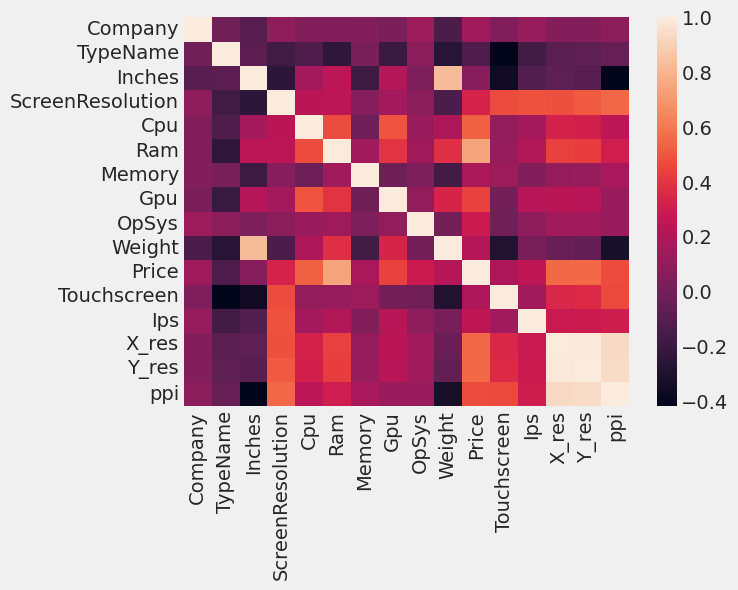

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

#analyxing the whole matrix
#relationshoip with each var with other variable
correlation = data_numeric.corr()
print(correlation)

sns.heatmap(correlation)


<ipython-input-141-ca40a3dd9d5b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data['Price']))


<Axes: xlabel='Price', ylabel='Density'>

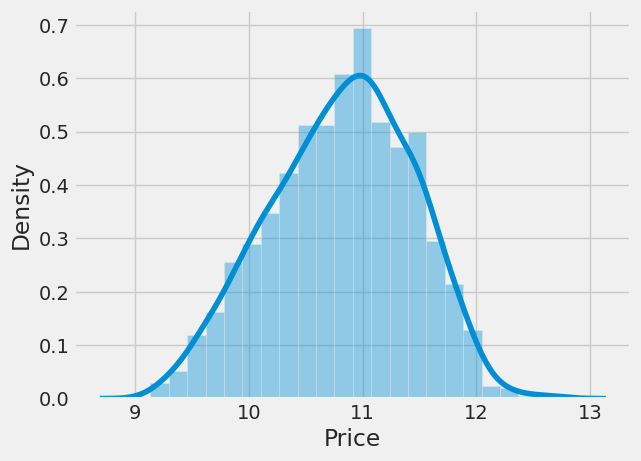

In [141]:
sns.distplot(np.log(data['Price']))

In [142]:

X=data.drop(columns=['Price'])
y=np.log(data['Price'])

In [143]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [145]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.15,random_state=2)


In [147]:
#we have to handle the categorical col like,company ,typename,cpu brand,gpu brand,os
#for that we have to use oneHotEncoder
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [148]:
X_test

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
248,HP,Notebook,4,1.49,0,1,165.632118,Intel Core i5,500,0,Intel,Windows
555,Asus,Notebook,4,2.00,0,0,100.454670,Other Intel Processor,500,0,Intel,Others/No OS/Linux
1251,HP,Notebook,4,1.86,0,0,100.454670,AMD Processor,500,0,AMD,Windows
547,Lenovo,Notebook,4,2.15,0,0,141.211998,Intel Core i5,1000,0,Intel,Others/No OS/Linux
885,HP,2 in 1 Convertible,4,1.28,1,0,165.632118,Intel Core i5,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1129,HP,Gaming,8,3.35,0,1,127.335675,Intel Core i5,1000,128,Nvidia,Windows
172,Lenovo,Notebook,4,2.20,0,0,100.454670,AMD Processor,500,0,AMD,Others/No OS/Linux
322,Asus,Notebook,8,2.00,0,0,157.350512,Intel Core i7,0,256,Intel,Windows
996,HP,Ultrabook,8,1.11,1,1,165.632118,Intel Core i7,0,256,Intel,Windows


In [149]:
data.head(10)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
5,Acer,Notebook,4,2.10,21312.0000,0,0,100.454670,AMD Processor,500,0,AMD,Windows
6,Apple,Ultrabook,16,2.04,114017.6016,0,1,220.534624,Intel Core i7,0,0,Intel,Mac
7,Apple,Ultrabook,8,1.34,61735.5360,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
8,Asus,Ultrabook,16,1.30,79653.6000,0,0,157.350512,Intel Core i7,0,512,Nvidia,Windows
9,Acer,Ultrabook,8,1.60,41025.6000,0,1,157.350512,Intel Core i5,0,256,Intel,Windows


In [150]:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [151]:
X_train.sample(10,random_state = 42)

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
160,Asus,Notebook,4,2.030,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
1230,Lenovo,Netbook,16,1.300,1,1,176.232574,Intel Core i7,0,512,Intel,Windows
104,Microsoft,Ultrabook,8,1.252,1,0,200.842560,Intel Core i5,0,256,Intel,Windows
73,MSI,Gaming,8,2.700,0,0,127.335675,Intel Core i5,1000,128,Nvidia,Windows
1147,Dell,Notebook,8,2.180,0,0,141.211998,Intel Core i7,0,256,Nvidia,Windows
979,Asus,Gaming,16,2.990,0,0,127.335675,Intel Core i7,1000,256,Nvidia,Windows
759,Acer,Notebook,4,2.100,0,0,100.454670,Intel Core i5,0,256,Intel,Windows
223,HP,Notebook,8,2.100,0,0,141.211998,Intel Core i5,1000,0,Intel,Windows
557,Lenovo,Notebook,6,2.800,0,0,106.113062,Intel Core i7,1000,128,Nvidia,Windows
144,HP,Notebook,4,1.860,0,0,100.454670,AMD Processor,0,256,AMD,Windows


In [152]:
y_train.sample(10,random_state = 42)

160      9.974498
1230    11.384092
104     11.175986
73      10.974071
1147    10.893168
979     11.442361
759     10.370823
223     10.652644
557     10.830970
144      9.886358
Name: Price, dtype: float64

DECISION TREE

In [153]:

import pandas as pd

In [154]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
#we'll import all algorithm as we don't know which one is best

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [155]:

step1= ColumnTransformer(transformers=[
     ('col_tnf',OneHotEncoder(sparse_output= False,drop='first'),[0,1,7,10,11])

 ],remainder='passthrough')

step2= DecisionTreeRegressor(max_depth=8)

pipe =Pipeline([
     ('step1',step1),
     ('step2',step2)
 ])
pipe.fit(X_train,y_train)

y_pred =pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8263224213742737
MAE 0.18862523242385215


**RANDOM** **FOREST**

Transformers: You have one transformer defined with the name 'col_tnf'. This transformer uses OneHotEncoder to encode categorical variables into one-hot encoded format.

In [158]:
 #the best algo ever
#gives highest value

step1=ColumnTransformer(transformers=[
     ('col_tnf',OneHotEncoder(sparse_output= False,drop='first'),[0,1,7,10,11])
 ],remainder='passthrough')

 #remove spaces and write as a fun.
step2= RandomForestRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15)

pipe =Pipeline([
     ('step1',step1),
     ('step2',step2)
 ])
pipe.fit(X_train,y_train)

y_pred =pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8873402378382488
MAE 0.15860130110457718


In [157]:
"""import numpy as np

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index  # Index of the feature to split on
        self.threshold = threshold  # Threshold value for the split
        self.left = left  # Left child node
        self.right = right  # Right child node
        self.value = value  # Prediction value if the node is a leaf


class CustomDecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def fit(self, X, y):
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        # Stopping criteria: if max_depth is reached or if node has few samples
        if (self.max_depth is not None and depth >= self.max_depth) or len(y) < self.min_samples_split:
            return Node(value=np.mean(y))

        num_features = X.shape[1]
        best_feature_index, best_threshold = None, None
        best_mse = float('inf')

        # Find the best split
        for feature_index in range(num_features):
            thresholds, mse = self._find_best_split(X[:, feature_index], y)
            if mse < best_mse:
                best_feature_index = feature_index
                best_threshold = thresholds
                best_mse = mse

        # If no suitable split found, create a leaf node
        if best_mse == float('inf'):
            return Node(value=np.mean(y))

        # Split the data using the best split
        left_indices = X[:, best_feature_index] <= best_threshold
        right_indices = X[:, best_feature_index] > best_threshold
        left_child = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_child = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(feature_index=best_feature_index, threshold=best_threshold, left=left_child, right=right_child)

    def _find_best_split(self, feature, target):
        unique_values = np.unique(feature)
        best_threshold, best_mse = None, float('inf')

        for threshold in unique_values:
            left_indices = feature <= threshold
            right_indices = feature > threshold

            if len(target[left_indices]) == 0 or len(target[right_indices]) == 0:
                continue

            mse = self._calculate_mse(target[left_indices], target[right_indices])
            if mse < best_mse:
                best_threshold = threshold
                best_mse = mse

        return best_threshold, best_mse

    def _calculate_mse(self, left_target, right_target):
        mse_left = np.mean((left_target - np.mean(left_target))**2)
        mse_right = np.mean((right_target - np.mean(right_target))**2)
        return mse_left + mse_right

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value

        if isinstance(x[node.feature_index], (int, float)):  # Numerical feature
            if x[node.feature_index] <= node.threshold:
                if node.left is not None:
                    return self._traverse_tree(x, node.left)
                else:
                    # Handle leaf node
                    return np.mean(self.y_train)
            else:
                if node.right is not None:
                    return self._traverse_tree(x, node.right)
                else:
                    # Handle leaf node
                    return np.mean(self.y_train)
        else:  # Categorical feature
            if x[node.feature_index] == node.threshold:
                if node.left is not None:
                    return self._traverse_tree(x, node.left)
                else:
                    # Handle leaf node
                    return np.mean(self.y_train)
            else:
                if node.right is not None:
                    return self._traverse_tree(x, node.right)
                else:
                    # Handle leaf node
                    return np.mean(self.y_train)
"""

In [182]:
"""step1= ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output= False,drop='first'),[0,1,7,10,11])

],remainder='passthrough')

step2= CustomDecisionTreeRegressor(max_depth=60)

pipe =Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)

y_pred =pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
"""

"step1= ColumnTransformer(transformers=[\n    ('col_tnf',OneHotEncoder(sparse_output= False,drop='first'),[0,1,7,10,11])\n\n],remainder='passthrough')\n\nstep2= CustomDecisionTreeRegressor(max_depth=60)\n\npipe =Pipeline([\n    ('step1',step1),\n    ('step2',step2)\n])\npipe.fit(X_train,y_train)\n\ny_pred =pipe.predict(X_test)\nprint('R2 score',r2_score(y_test,y_pred))\nprint('MAE',mean_absolute_error(y_test,y_pred))\n"

In [159]:
#data['ppi'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype('float')#to calculate ppi
#ppi = (((length**2) + (hight**2))**0.5/data['Inches']).astype('float')

In [160]:
#so now we are done with modeling part
#let's create a website
#here we require pipe object
#we will use random forest as it shows the best result
#1.export rd and 2. export dataframe consisting of diff categories value

###exporrting the model
import pickle
pickle.dump(data,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))
data

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [161]:
X_train.sample(10,random_state = 42)

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
160,Asus,Notebook,4,2.030,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
1230,Lenovo,Netbook,16,1.300,1,1,176.232574,Intel Core i7,0,512,Intel,Windows
104,Microsoft,Ultrabook,8,1.252,1,0,200.842560,Intel Core i5,0,256,Intel,Windows
73,MSI,Gaming,8,2.700,0,0,127.335675,Intel Core i5,1000,128,Nvidia,Windows
1147,Dell,Notebook,8,2.180,0,0,141.211998,Intel Core i7,0,256,Nvidia,Windows
979,Asus,Gaming,16,2.990,0,0,127.335675,Intel Core i7,1000,256,Nvidia,Windows
759,Acer,Notebook,4,2.100,0,0,100.454670,Intel Core i5,0,256,Intel,Windows
223,HP,Notebook,8,2.100,0,0,141.211998,Intel Core i5,1000,0,Intel,Windows
557,Lenovo,Notebook,6,2.800,0,0,106.113062,Intel Core i7,1000,128,Nvidia,Windows
144,HP,Notebook,4,1.860,0,0,100.454670,AMD Processor,0,256,AMD,Windows


In [162]:
X_test.sample(10,random_state = 42)

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
391,Asus,Gaming,16,3.00,0,0,127.335675,Intel Core i7,1000,256,Nvidia,Windows
519,Asus,Gaming,16,3.00,0,0,127.335675,Intel Core i7,1000,256,Nvidia,Windows
477,Lenovo,Notebook,8,1.70,0,0,157.350512,Intel Core i5,0,180,Intel,Windows
921,HP,Ultrabook,8,1.84,0,0,141.211998,Intel Core i7,0,256,AMD,Windows
551,Dell,Notebook,8,1.90,0,0,141.211998,Intel Core i5,0,256,Intel,Windows
285,Acer,Notebook,12,2.15,1,1,141.211998,Intel Core i7,1000,0,Intel,Windows
856,Asus,Notebook,4,2.00,0,0,100.454670,Other Intel Processor,1000,0,Intel,Windows
402,Lenovo,Notebook,8,2.10,0,1,141.211998,Intel Core i5,1000,256,AMD,Windows
738,MSI,Gaming,16,1.80,0,0,141.211998,Intel Core i7,1000,256,Nvidia,Windows
335,HP,Notebook,8,1.48,0,0,157.350512,Intel Core i5,0,256,Intel,Windows


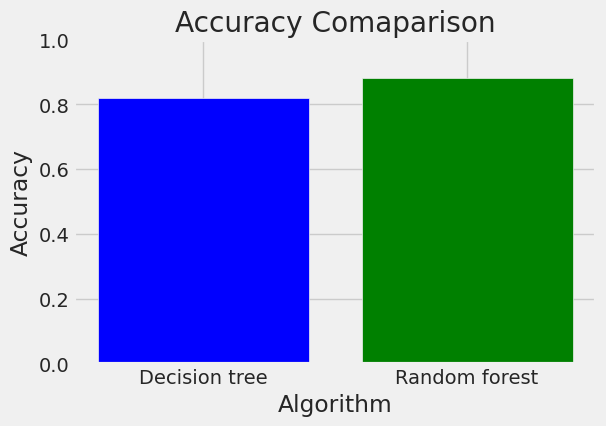

In [164]:
import matplotlib.pyplot as plt
accuracy_decision_tree=0.82
accuracy_random_forest=0.88

plt.figure(figsize=(6,4))
labels = ['Decision tree', 'Random forest']
accuracies = [accuracy_decision_tree, accuracy_random_forest]
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comaparison')
plt.ylim(0,1)
plt.show()

In [169]:
cm=int(input("Enter cm:"))
inches= cm/2.54
print("inches:",inches)

Enter cm:40
inches: 15.748031496062993


In [170]:
#data['ppi'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype('float')#to calculate ppi
X_ress=int(input("Enter length:"))
y_ress=int(input("Enter length:"))
inches=float(input("Enter length:"))
ppi = (((X_ress**2) + (y_ress**2))**0.5/inches)
print(ppi)

Enter length:1920
Enter length:1080
Enter length:15.7
140.31255860396806


In [181]:
from types import GeneratorType
import pickle
import numpy as np

# Load the model and data
pipe = pickle.load(open('pipe.pkl', 'rb'))
data = pickle.load(open('df.pkl', 'rb'))

# Ask user for input
Company = input("Enter the brand of the laptop: ")
TypeName = input("Enter the type of the laptop: ")
Ram = int(input("Enter the RAM (in GB): "))
Weight = float(input("Enter the weight of the laptop: "))
Touchscreen = input("Does the laptop have touchscreen? (Yes/No): ")
Ips = input("Does the laptop have IPS display? (Yes/No): ")
ppi=float(input("ppi value:"))
#screen_size = float(input("Enter the screen size: "))#
#resolution = input("Enter the screen resolution (e.g., 1920x1080): ")
Cpu= input("Enter the CPU brand: ")
HDD = int(input("Enter the HDD size (in GB): "))
SSD = int(input("Enter the SSD size (in GB): "))
Gpu  = input("Enter the GPU brand: ")
os = input("Enter the operating system: ")

# Convert touchscreen and IPS to binary values
Touchscreen = 1 if Touchscreen.lower() == 'yes' else 0
Ips = 1 if Ips.lower() == 'yes' else 0


# Prepare query array
query = np.array([Company, TypeName, Ram, Weight, Touchscreen, Ips, ppi, Cpu, HDD, SSD, Gpu, os])
query = query.reshape(1, -1)

# Make prediction
predicted_price = pipe.predict(query)


pipe.fit(X_train, y_train)




#predicted_price = pipe.predict([query])[0]
#print("Predicted sentiment:", int(predicted_price))

# Display the predicted price
print("The predicted price of this configuration is:", int(predicted_price[0]))
np.exp(pipe.predict(query))

Enter the brand of the laptop: Huawei
Enter the type of the laptop: Ultrabook
Enter the RAM (in GB): 8
Enter the weight of the laptop: 1.3
Does the laptop have touchscreen? (Yes/No): No
Does the laptop have IPS display? (Yes/No): Yes
ppi value:157.3505
Enter the CPU brand: Intel Core i5
Enter the HDD size (in GB): 512
Enter the SSD size (in GB): 0
Enter the GPU brand: Intel
Enter the operating system: Windows


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


The predicted price of this configuration is: 11


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([59906.98745616])

In [180]:
#Huawei Ultrabook 8 1.3 No Yes 157.3505 Intel Core i5 512 0 Intel Windows

In [ ]:
#Apple	Ultrabook	8	1.37	71378.6832	0	1	226.983005	Intel Core i5	0	128	Intel	Mac

In [ ]:
 #"MSI","Gaming",16,2.04,0,1,139.88,"Intel Core i5",0,512,"Nvidia","Windows"
 #140.31255860396806
 #inches=15.7

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([88147.0118474])